# Tutorial: Load local phenotype and genotype data into rTASSEL 

## Enter your notebook title here

**Objective**: Loading phenotype and genotype data into rTASSEL  
**Data**: Describe your data set here  
**User and contact**: Enter your name and contact here

### Table of contents
* [Notes](#Notes) 
* [Libraries](#Libraries)
* [Parameters and functions](#Parameters-and-functions)
* [Data](#Data)
    + [Load and inspect data in R](#Load-and-inspect-data-in-R)
    + [Load phenotype data in rTASSEL](#Load-phenotype-data-in-rTASSEL)
    + [Load genotype data in rTASSEL](#Load-genotype-data-in-rTASSEL)
* [Combine data in rTASSEL](#Combine-data-in-rTASSEL)
* [References and additional resources](#References-and-additional-resources)

## Notes

If you are unfamiliar with the data format requirements for TASSEL and rTASSEL please review the following resources:
- [TASSEL user manual](https://bitbucket.org/tasseladmin/tassel-5-source/wiki/UserManual/Load/Load)
- [Instructional video](https://www.youtube.com/watch?v=4W3Ohw6Zckg)

**rTASSEL genotype file requirements**:  

rTASSEL accepts the following genotype formats:
- hapmap (HMP)
- HDF5 (hierarchical data format version 5)
- VCF (variant call format)
- Plink

Again for more detail see the manual [here](https://bitbucket.org/tasseladmin/tassel-5-source/wiki/UserManual/Load/Load). 

**rTASSEL phenotype requirements**: 

In summary, rTASSEL accepts data structured per the following: 
- A header that defines data structure and a body containing the main data. Tabs should be used as delimiters.
- Data is organized as a two-dimensional table with observations as rows and attributes as columns. The first attribute (column) should always be taxa. Subsequent columns can be data, covariate, or factor. Attributes of type "data" are modeled as dependent variables and must be numerical and continuous.

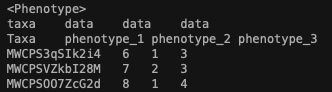

For more detail see the [manual](https://bitbucket.org/tasseladmin/tassel-5-source/wiki/UserManual/Load/Load) under "Numerical Data."

In [ ]:
getwd()

In [ ]:
Sys.Date()

## Libraries

In [ ]:
library(data.table) #Efficient I/O handling for delimited data
library(rTASSEL) #R interface to TASSEL

## Parameters and functions

In [ ]:
### PLEASE EDIT WITH THE PATHS TO YOUR DATA ###

# Path to phenotype data
myPhenoPath <- "/path/to/phenotype/data"

# Path to genotype data
myGenoPath <- "/path/to/genotype/data"

## Data

### Load and inspect data in R

In [ ]:
# Inspect phenotype data in R
myPhenoTable <- data.table::fread(myPhenoPath, skip = 2)

In [ ]:
myPhenoTable |> head()

In [ ]:
myPhenoTable |> dim()

In [ ]:
myPhenoTable |> names() |> cat(sep = "\n")

In [ ]:
# Inspect genotype data in R
myGenoTable <- data.table::fread(myGenoPath)

In [ ]:
myGenoTable |> head()

In [ ]:
myGenoTable |> dim()

In [ ]:
myGenoTable |> names() |> cat(sep = "\n") 

### Load phenotype data in rTASSEL

In [ ]:
tasPheno <- rTASSEL::readPhenotypeFromPath(
    path = myPhenoPath
)

In [ ]:
### Note: ####

# If you need to manipulate your phenotype data in R prior to loading into rTASSEL you can load your data from an R dataframe rather than from a path. You will need to edit "myPhenoDataframe" with your dataframe in the code below.

#tasPheno <- rTASSEL::readPhenotypeFromDataFrame(
#    phenotypeDF = myPhenoDataframe,
#    taxaID = "Taxon",
#    attributeTypes = NULL
#)
#tasPhenoDF

In [ ]:
tasPheno

### Load genotype data into rTASSEL

In [ ]:
# Load in VCF file
tasGeno <- rTASSEL::readGenotypeTableFromPath(
    path = myGenoPath
)
tasGeno

### Combine data into rTASSEL

In [ ]:
tasGenoPheno <- rTASSEL::readGenotypePhenotype(
    genoPathOrObj = myGenoPath,
    phenoPathDFOrObj = myPhenoPath
)

tasGenoPheno

## References and additional resources

To cite rTASSEL, please use the following citation:

Monier et al., (2022). rTASSEL: An R interface to TASSEL for analyzing genomic diversity. Journal of Open Source Software, 7(76), 4530, https://doi.org/10.21105/joss.04530.

You can find more information about rTASSEL [here](https://maize-genetics.github.io/rTASSEL/index.html)

and an rTASSEL tutorial in binder [here](https://mybinder.org/v2/gh/btmonier/rTASSEL_sandbox/HEAD?labpath=getting_started.ipynb).